# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/E資格/ステージ３')
sys.path.append('/content/drive/MyDrive/E資格/ステージ３/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12333333333333334
                : 10. 正答率(テスト) = 0.1083
Generation: 20. 正答率(トレーニング) = 0.19333333333333333
                : 20. 正答率(テスト) = 0.1417
Generation: 30. 正答率(トレーニング) = 0.25666666666666665
                : 30. 正答率(テスト) = 0.1723
Generation: 40. 正答率(トレーニング) = 0.38333333333333336
                : 40. 正答率(テスト) = 0.2593
Generation: 50. 正答率(トレーニング) = 0.4866666666666667
                : 50. 正答率(テスト) = 0.3382
Generation: 60. 正答率(トレーニング) = 0.5366666666666666
                : 60. 正答率(テスト) = 0.3886
Generation: 70. 正答率(トレーニング) = 0.56
                : 70. 正答率(テスト) = 0.4203
Generation: 80. 正答率(トレーニング) = 0.63
                : 80. 正答率(テスト) = 0.4482
Generation: 90. 正答率(トレーニング) = 0.7
                : 90. 正答率(テスト) = 0.4914
Generation: 100. 正答率(トレーニング) = 0.7233333333333334
                : 100. 正答率(テスト) = 0.5227
Generation: 110. 正答率(トレーニング) = 0.7366666666666667
                : 110. 正答率(テスト) = 0.5374
Generation: 120. 正答率(トレーニング) = 0.77
          

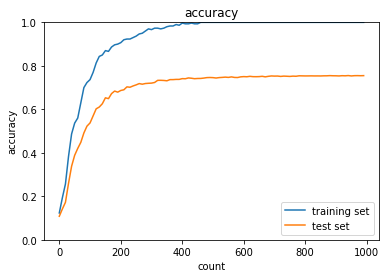

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.21
                : 10. 正答率(テスト) = 0.168
Generation: 20. 正答率(トレーニング) = 0.24333333333333335
                : 20. 正答率(テスト) = 0.1967
Generation: 30. 正答率(トレーニング) = 0.29
                : 30. 正答率(テスト) = 0.2263
Generation: 40. 正答率(トレーニング) = 0.3433333333333333
                : 40. 正答率(テスト) = 0.2599
Generation: 50. 正答率(トレーニング) = 0.37666666666666665
                : 50. 正答率(テスト) = 0.2837
Generation: 60. 正答率(トレーニング) = 0.4166666666666667
                : 60. 正答率(テスト) = 0.3135
Generation: 70. 正答率(トレーニング) = 0.51
                : 70. 正答率(テスト) = 0.3729
Generation: 80. 正答率(トレーニング) = 0.5433333333333333
                : 80. 正答率(テスト) = 0.4065
Generation: 90. 正答率(トレーニング) = 0.5666666666666667
                : 90. 正答率(テスト) = 0.4222
Generation: 100. 正答率(トレーニング) = 0.62
                : 100. 正答率(テスト) = 0.463
Generation: 110. 正答率(トレーニング) = 0.64
                : 110. 正答率(テスト) = 0.4807
Generation: 120. 正答率(トレーニング) = 0.68
                : 120. 正答率(テスト) = 0.5004


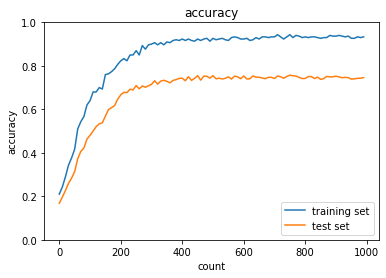

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.4166666666666667
                : 10. 正答率(テスト) = 0.297
Generation: 20. 正答率(トレーニング) = 0.69
                : 20. 正答率(テスト) = 0.5271
Generation: 30. 正答率(トレーニング) = 0.4066666666666667
                : 30. 正答率(テスト) = 0.3368
Generation: 40. 正答率(トレーニング) = 0.6
                : 40. 正答率(テスト) = 0.4231
Generation: 50. 正答率(トレーニング) = 0.7733333333333333
                : 50. 正答率(テスト) = 0.6204
Generation: 60. 正答率(トレーニング) = 0.6933333333333334
                : 60. 正答率(テスト) = 0.5715
Generation: 70. 正答率(トレーニング) = 0.8366666666666667
                : 70. 正答率(テスト) = 0.6553
Generation: 80. 正答率(トレーニング) = 0.8166666666666667
                : 80. 正答率(テスト) = 0.671
Generation: 90. 正答率(トレーニング) = 0.88
                : 90. 正答率(テスト) = 0.676
Generation: 100. 正答率(トレーニング) = 0.51
                : 100. 正答率(テスト) = 0.3899
Generation: 110. 正答率(トレーニング) = 0.5766666666666667
                : 110. 正答率(テスト) = 0.4097
Generation: 120. 正答率(トレーニング) = 0.91
                : 120. 正答率(テスト)

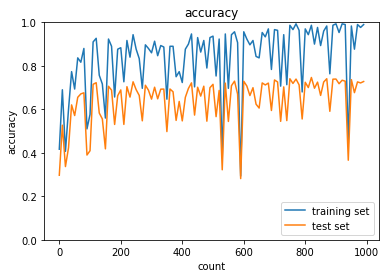

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

## Dropout

In [6]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10333333333333333
                : 10. 正答率(テスト) = 0.1062
Generation: 20. 正答率(トレーニング) = 0.15
                : 20. 正答率(テスト) = 0.1206
Generation: 30. 正答率(トレーニング) = 0.18333333333333332
                : 30. 正答率(テスト) = 0.1396
Generation: 40. 正答率(トレーニング) = 0.18333333333333332
                : 40. 正答率(テスト) = 0.1543
Generation: 50. 正答率(トレーニング) = 0.19
                : 50. 正答率(テスト) = 0.1686
Generation: 60. 正答率(トレーニング) = 0.19333333333333333
                : 60. 正答率(テスト) = 0.1805
Generation: 70. 正答率(トレーニング) = 0.21
                : 70. 正答率(テスト) = 0.1926
Generation: 80. 正答率(トレーニング) = 0.22
                : 80. 正答率(テスト) = 0.2081
Generation: 90. 正答率(トレーニング) = 0.23333333333333334
                : 90. 正答率(テスト) = 0.2203
Generation: 100. 正答率(トレーニング) = 0.2733333333333333
                : 100. 正答率(テスト) = 0.249
Generation: 110. 正答率(トレーニング) = 0.27666666666666667
                : 110. 正答率(テスト) = 0.2507
Generation: 120. 正答率(トレーニング) = 0.2833333333333333
        

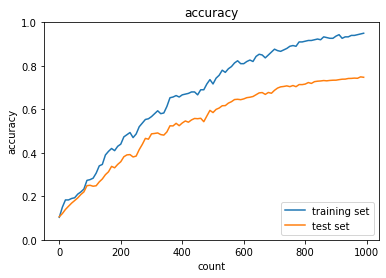

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08666666666666667
                : 10. 正答率(テスト) = 0.1098
Generation: 20. 正答率(トレーニング) = 0.13333333333333333
                : 20. 正答率(テスト) = 0.115
Generation: 30. 正答率(トレーニング) = 0.15666666666666668
                : 30. 正答率(テスト) = 0.138
Generation: 40. 正答率(トレーニング) = 0.21666666666666667
                : 40. 正答率(テスト) = 0.1632
Generation: 50. 正答率(トレーニング) = 0.26666666666666666
                : 50. 正答率(テスト) = 0.1816
Generation: 60. 正答率(トレーニング) = 0.2833333333333333
                : 60. 正答率(テスト) = 0.1965
Generation: 70. 正答率(トレーニング) = 0.29333333333333333
                : 70. 正答率(テスト) = 0.2035
Generation: 80. 正答率(トレーニング) = 0.2866666666666667
                : 80. 正答率(テスト) = 0.2085
Generation: 90. 正答率(トレーニング) = 0.30666666666666664
                : 90. 正答率(テスト) = 0.2228
Generation: 100. 正答率(トレーニング) = 0.3333333333333333
                : 100. 正答率(テスト) = 0.2409
Generation: 110. 正答率(トレーニング) = 0.35333333333333333
                : 110. 正答率(テスト) = 0.2529
G

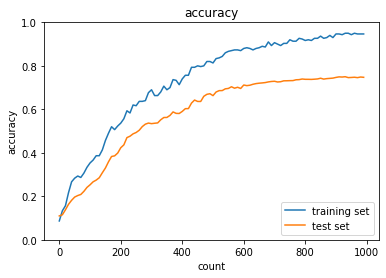

In [8]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()